#### Mnist datset
#### Dataloader and Transformation
#### Multileyer NN, activation function
#### Loss and optimizer
#### Training Loop(batch training)
#### Model evaluation
#### Gpu support

In [46]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [47]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [48]:
# hyper parameters
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learnig_rate = 0.001

In [49]:
# Mnist
train_dataset = torchvision.datasets.MNIST(root = './data', train = True, 
                                           transform = transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root = './data', train = True, 
                                           transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [50]:
examples = iter(train_loader)
example_data, example_targets = examples.next()
print(example_data.shape, example_targets.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


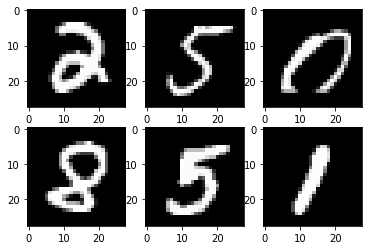

In [51]:
for i in range (6):
    plt.subplot(2,3, i+1)
    plt.imshow(example_data[i][0], cmap="gray")
plt.show()   

In [52]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out    

In [53]:
model = NeuralNet(input_size, hidden_size, num_classes)
model.cuda()

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learnig_rate)

In [55]:
# training loop 
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# test
with torch.no_grad():
    n_correct = 0 
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.shape[0]
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

        

Epoch [1/10], Step [100/600], Loss: 0.0288
Epoch [1/10], Step [200/600], Loss: 0.0106
Epoch [1/10], Step [300/600], Loss: 0.0601
Epoch [1/10], Step [400/600], Loss: 0.0284
Epoch [1/10], Step [500/600], Loss: 0.0274
Epoch [1/10], Step [600/600], Loss: 0.0267
Epoch [2/10], Step [100/600], Loss: 0.0478
Epoch [2/10], Step [200/600], Loss: 0.0363
Epoch [2/10], Step [300/600], Loss: 0.0097
Epoch [2/10], Step [400/600], Loss: 0.0166
Epoch [2/10], Step [500/600], Loss: 0.0091
Epoch [2/10], Step [600/600], Loss: 0.0885
Epoch [3/10], Step [100/600], Loss: 0.0244
Epoch [3/10], Step [200/600], Loss: 0.0484
Epoch [3/10], Step [300/600], Loss: 0.0211
Epoch [3/10], Step [400/600], Loss: 0.0300
Epoch [3/10], Step [500/600], Loss: 0.0174
Epoch [3/10], Step [600/600], Loss: 0.0283
Epoch [4/10], Step [100/600], Loss: 0.0103
Epoch [4/10], Step [200/600], Loss: 0.0401
Epoch [4/10], Step [300/600], Loss: 0.0116
Epoch [4/10], Step [400/600], Loss: 0.0163
Epoch [4/10], Step [500/600], Loss: 0.0386
Epoch [4/10